## Teaching Assistant Evaluation Data Set

### Data Set Information:

This is a UCI dataset taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Teaching+Assistant+Evaluation).
The data consist of evaluations of teaching performance over three regular semesters and two summer semesters of 151 teaching assistant (TA) assignments at the Statistics Department of the University of Wisconsin-Madison. The scores were divided into 3 roughly equal-sized categories ("low", "medium", and "high") to form the class variable.

Attribute Information:

1. Whether or not the TA is a native English speaker (binary); 1=English speaker, 2=non-English speaker
2. Course instructor (categorical, 25 categories)
3. Course (categorical, 26 categories)
4. Summer or regular semester (binary) 1=Summer, 2=Regular
5. Class size (numerical)
6. Class attribute (categorical) 1=Low, 2=Medium, 3=High

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
data = 'data/tae.data'
df = pd.read_csv(data, header=None, names=['NativeEngSpeaker','CourseInst','Course', 'Sum/Reg', 'ClassSize', 'ClassAttr'])
df.head()

,NativeEngSpeaker,CourseInst,Course,Sum/Reg,ClassSize,ClassAttr
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   NativeEngSpeaker  151 non-null    int64
 1   CourseInst        151 non-null    int64
 2   Course            151 non-null    int64
 3   Sum/Reg           151 non-null    int64
 4   ClassSize         151 non-null    int64
 5   ClassAttr         151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [4]:
df.describe()

,NativeEngSpeaker,CourseInst,Course,Sum/Reg,ClassSize,ClassAttr
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


Modify data types

In [5]:
eng_replacement = {'1':'Native Speaker', '2':'Non-Native Speaker'}
df['NativeEngSpeaker'] = df['NativeEngSpeaker'].astype('str').replace(eng_replacement, regex=True)

In [6]:
sum_replacement = {'1':'Summer', '2':'Regular'}
df['Sum/Reg'] = df['Sum/Reg'].astype('str').replace(sum_replacement, regex=True)

In [7]:
att_replacement = {'1':'Low', '2':'Medium', '3':'High'}
df['ClassAttr'] = df['ClassAttr'].astype('str').replace(att_replacement, regex=True)

In [8]:
df[['CourseInst', 'Course']] = df[['CourseInst', 'Course']].astype('str')

In [9]:
df

,NativeEngSpeaker,CourseInst,Course,Sum/Reg,ClassSize,ClassAttr
0,Native Speaker,23,3,Summer,19,High
1,Non-Native Speaker,15,3,Summer,17,High
2,Native Speaker,23,3,Regular,49,High
3,Native Speaker,5,2,Regular,33,High
4,Non-Native Speaker,7,11,Regular,55,High
...,...,...,...,...,...,...
146,Non-Native Speaker,3,2,Regular,26,Low
147,Non-Native Speaker,10,3,Regular,12,Low
148,Native Speaker,18,7,Regular,48,Low
149,Non-Native Speaker,22,1,Regular,51,Low


In [10]:
df.describe()

,ClassSize
count,151.000000
mean,27.867550
std,12.893758
min,3.000000
25%,19.000000
50%,27.000000
75%,37.000000
max,66.000000


**Investigating Outlier**

{'whiskers': [<matplotlib.lines.Line2D at 0x2bc8e71bd30>,
 'caps': [<matplotlib.lines.Line2D at 0x2bc8e7323d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bc8e71b8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bc8e732af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bc8e732e80>],
 'means': []}

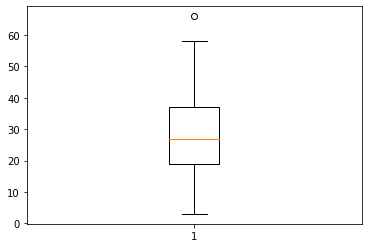

In [11]:
plt.boxplot(x=df['ClassSize'])

In [12]:
df.loc[df['ClassSize'] == 66]

,NativeEngSpeaker,CourseInst,Course,Sum/Reg,ClassSize,ClassAttr
116,Non-Native Speaker,15,1,Regular,66,Low


**Observation**: It just happened to have been a large class and will not be removed

### Looking at Various Distributions

#### Class Size

<AxesSubplot:ylabel='Frequency'>

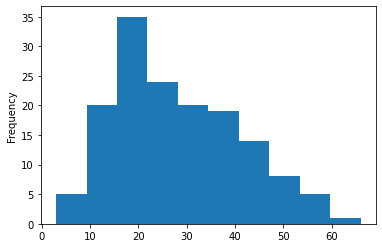

In [13]:
df['ClassSize'].plot(kind='hist')

Most of the classes seem to have a class size of about 25

#### Courses

<AxesSubplot:xlabel='Course', ylabel='count'>

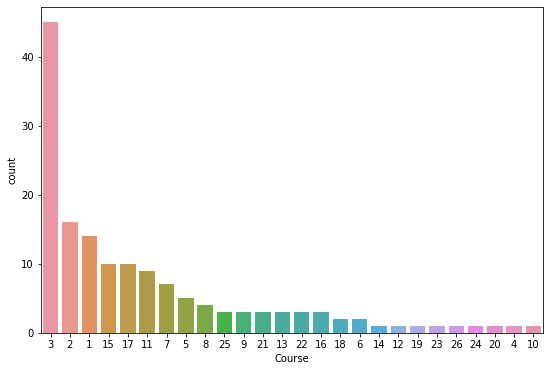

In [14]:
plt.figure(figsize=(9,6))
sns.countplot(x=df['Course'], order=df['Course'].value_counts().index)

Course 3 was the most taken class in this data set

#### Semester Type

<AxesSubplot:xlabel='Sum/Reg', ylabel='count'>

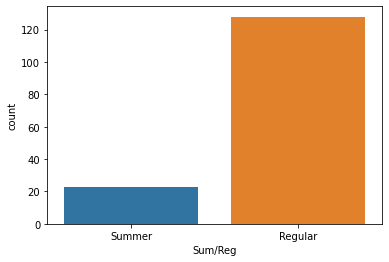

In [15]:
sns.countplot(x=df['Sum/Reg'])

#### Course Instructor

<AxesSubplot:xlabel='CourseInst', ylabel='count'>

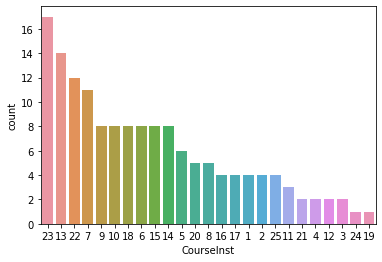

In [16]:
sns.countplot(x=df['CourseInst'], order=df['CourseInst'].value_counts().index)

From the data, there was more than one TA for the same courses and different TAs had different number of courses.

#### Native Speaker Status

<AxesSubplot:xlabel='NativeEngSpeaker', ylabel='Density'>

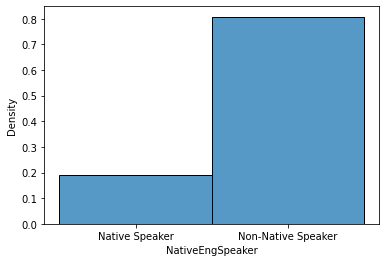

In [17]:
sns.histplot(x=df['NativeEngSpeaker'], stat='density')

The ratio of TAs who are native speakers to those who are not is about 1:4

#### Class Ratings

<AxesSubplot:xlabel='ClassAttr', ylabel='count'>

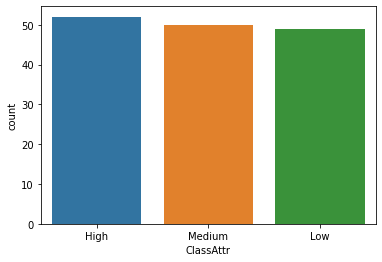

In [18]:
sns.countplot(x=df['ClassAttr'])

The ratings seems to have been evenly spread across the board

### Native Speaker Status Breakdown

<AxesSubplot:xlabel='NativeEngSpeaker', ylabel='count'>

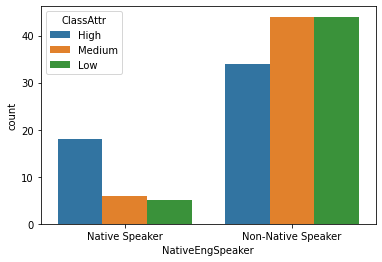

In [19]:
sns.countplot(x=df['NativeEngSpeaker'], hue=df['ClassAttr'])

From the bar chart above, we see that the there are significantly more non-native English speakers than native so a look at their ratings percent-wise will give us a better understanding of which group tends to receive better ratings (if any).

In [20]:
def percentage(*col_name):
    arr = []
    for name in col_name:
        arr.append(name)
    
    data_frame = (df.groupby(arr).size() / df.groupby(arr[0]).size()).reset_index().rename({0:'Percent'}, axis=1)
#    data_frame = (df.groupby([col1_name, col2_name]).size() / df.groupby(col1_name).size()).reset_index().rename({0:'Percent'}, axis=1)
    return data_frame

In [21]:
speaker_status = percentage('NativeEngSpeaker', 'ClassAttr')

<AxesSubplot:xlabel='NativeEngSpeaker', ylabel='Percent'>

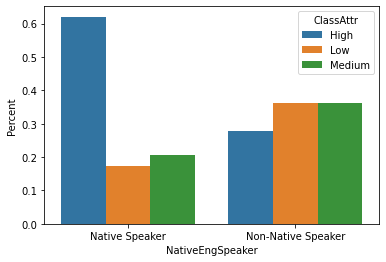

In [22]:
sns.barplot(data=speaker_status, x='NativeEngSpeaker', y='Percent', hue='ClassAttr')

#### Observations

It is clear from the chart above that, as a group, native speakers tend to receive higher class ratings than non-native speakers.

### Confirmation of Assumption that Class Rating is Associated with Native Speaker Status

To test our assumption, we will use a chi-square test of independence:
- *Null Hypothesis* : The proportion of class attributes is independent of native speaker status.
- *Alternative Hypothesis* : The proportion of class attributes is associated with native speaker status.
- We will use an aplha of 0.05

In [23]:
cont_table  = pd.crosstab(df['NativeEngSpeaker'], df['ClassAttr'])
cont_table

ClassAttr,High,Low,Medium
NativeEngSpeaker,,,
Native Speaker,18,5,6
Non-Native Speaker,34,44,44


In [24]:
chi2, p, dof, exp_table = scipy.stats.chi2_contingency(cont_table, correction = False)

In [25]:
print(exp_table)

[[ 9.98675497  9.41059603  9.60264901]
 [42.01324503 39.58940397 40.39735099]]


In [26]:
print(p)

0.0022546095355534122


Since the p-value is less than 0.05, we reject the null hypothesis in favor of the alternative hypothesis confirming our earlier assumption.

### Class Size and Semester Period

<AxesSubplot:xlabel='Sum/Reg', ylabel='ClassSize'>

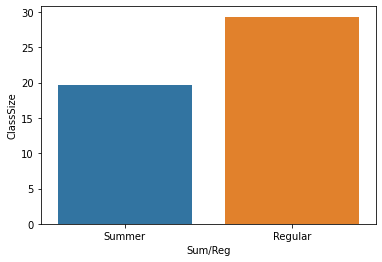

In [27]:
sns.barplot(data=df, x='Sum/Reg', y='ClassSize', ci=None)

Summer classes tend to run smaller than regular semester classes.

In [28]:
sem_attr = percentage('Sum/Reg', 'ClassAttr')

<AxesSubplot:xlabel='Sum/Reg', ylabel='Percent'>

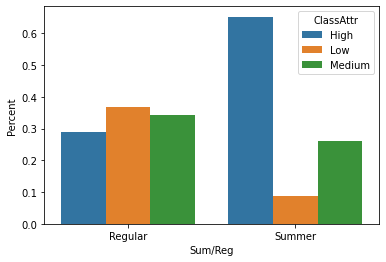

In [29]:
sns.barplot(data=sem_attr, x='Sum/Reg', y='Percent', hue='ClassAttr')

From the graph, we see that summer classes, as a group, score very highly than regular semester classes.

#### Confirmation of Assumption That Summer Classes Are Rated Higher

To test our assumption, we will use a chi-square test of independence:

- *Null Hypothesis* : The proportion of native speakers is independent of semester period.
- *Alternative Hypothesis* : The proportion of native speakers is associated with semester period.
- We will use an aplha of 0.05

In [30]:
cont_table  = pd.crosstab(df['Sum/Reg'], df['ClassAttr'])
cont_table

ClassAttr,High,Low,Medium
Sum/Reg,,,
Regular,37,47,44
Summer,15,2,6


In [31]:
chi2, p, dof, exp_table = scipy.stats.chi2_contingency(cont_table, correction = True)

In [32]:
print(exp_table)

[[44.0794702  41.53642384 42.38410596]
 [ 7.9205298   7.46357616  7.61589404]]


In [33]:
print(p)

0.0018479434086781862


### Class Size and Class Attribute

From the previous section, we saw that summer classes were generally rated higher than regular classes. Could this be due to class size (since summer classes are smaller)?

We will test to see if the class size has an effect on the ratings of the class. To do that we will use a one-way ANOVA test.
- First, we group the classes into 3 groups based on their size
- Next, we use the Levene's test to determine if there is any difference in their variance.
- Then, we apply a one-way ANOVA to determine if class attribute rating differ by class size.
- We will use an alpha of 0.05 for all tests

In [34]:
# Putting the classes into groups based on class size (in preparation for ANOVA)

df.loc[(df['ClassSize'] <= 21), 'ClassGroupSize'] = '21 and smaller'
df.loc[(df['ClassSize'] > 21) & (df['ClassSize'] < 42), 'ClassGroupSize'] = 'Between 21 and 42'
df.loc[(df['ClassSize'] > 42) & (df['ClassSize'] <= 63), 'ClassGroupSize'] = 'Greater than 42'

#### Visualize the Distribution of the Class Attributes According to Class Size

In [35]:
class_size_attr = percentage('ClassGroupSize', 'ClassAttr')

<AxesSubplot:xlabel='ClassGroupSize', ylabel='Percent'>

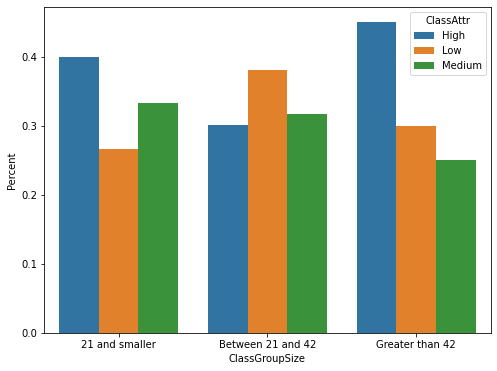

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(data=class_size_attr, x='ClassGroupSize', y='Percent', hue='ClassAttr')

There does not seem to be significant differences between the the groups. We will confirm our observation with the one-way ANOVA

In [37]:
# Prepare the ClassAttr variable for use in ANOVA

att_replacement = {'Low':1, 'Medium':2, 'High':3}
df['ClassAttr'] = df['ClassAttr'].replace(att_replacement, regex=True).astype('Int64')

In [38]:
df

,NativeEngSpeaker,CourseInst,Course,Sum/Reg,ClassSize,ClassAttr,ClassGroupSize
0,Native Speaker,23,3,Summer,19,3,21 and smaller
1,Non-Native Speaker,15,3,Summer,17,3,21 and smaller
2,Native Speaker,23,3,Regular,49,3,Greater than 42
3,Native Speaker,5,2,Regular,33,3,Between 21 and 42
4,Non-Native Speaker,7,11,Regular,55,3,Greater than 42
...,...,...,...,...,...,...,...
146,Non-Native Speaker,3,2,Regular,26,1,Between 21 and 42
147,Non-Native Speaker,10,3,Regular,12,1,21 and smaller
148,Native Speaker,18,7,Regular,48,1,Greater than 42
149,Non-Native Speaker,22,1,Regular,51,1,Greater than 42


#### Levene's test hypothesis:
- *Null Hypothesis* : µ\_1 = µ\_2 = µ\_3  (the three group means are equal)
- *Alternate Hypothesis* :  At least one of the means differ

In [39]:
# Run the Levene's test

scipy.stats.levene(df[df['ClassGroupSize'] == '21 and smaller']['ClassAttr'],
                   df[df['ClassGroupSize'] == 'Between 21 and 42']['ClassAttr'],
                   df[df['ClassGroupSize'] == 'Greater than 42']['ClassAttr'],
                   center='mean')

LeveneResult(statistic=0.22941921274839536, pvalue=0.7952934754674904)

From the test, with a p-value that is greater than 0.05, we fail to reject the null hypothesis and assume equal variance in all groups. We can then proceed with the one-way ANOVA

#### ANOVA test hypothesis:
- *Null Hypothesis* : µ\_1 = µ\_2 = µ\_3  (there is no difference in the means)
- *Alternate Hypothesis* :  At least one of the means differs

In [40]:
# Prepare and run the one-way ANOVA

smaller_than_21 = df[df['ClassGroupSize'] == '21 and smaller']['ClassAttr']
between_21_and_42 = df[df['ClassGroupSize'] == 'Between 21 and 42']['ClassAttr']
greater_than_42 = df[df['ClassGroupSize'] == 'Greater than 42']['ClassAttr']

In [41]:
scipy.stats.f_oneway(smaller_than_21, between_21_and_42, greater_than_42)

F_onewayResult(statistic=1.2105972973742596, pvalue=0.30111944618674336)

Since the p-value is greater than 0.05, we fail to reject the null hypothesis and confirm there is no statistically significant difference in the attribute ratings based on class size.

### Semester Period and Native Speaker Status

In [42]:
att_replacement = {'1':'Low', '2':'Medium', '3':'High'}
df['ClassAttr'] = df['ClassAttr'].astype('str').replace(att_replacement, regex=True)

In [43]:
sum_native = percentage('Sum/Reg', 'NativeEngSpeaker')

<AxesSubplot:xlabel='Sum/Reg', ylabel='Percent'>

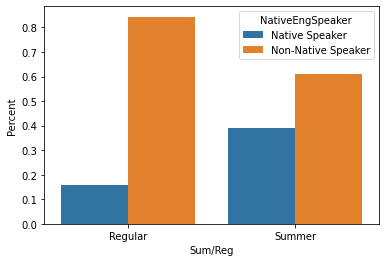

In [44]:
sns.barplot(data=sum_native, x='Sum/Reg', y='Percent', hue='NativeEngSpeaker')

From the chart, there were a lot more native speakers, percent-wise, in the summer semesters than in the regular semesters.

#### Confirmation of Assumption that Native Speaker Percentage is Associated with Semester Type

To test our assumption, we will use a chi-square test of independence:

- *Null Hypothesis* : The proportion of native speakers is independent of semester period.
- *Alternative Hypothesis* : The proportion of native speakers is associated with semester period.
- We will use an aplha of 0.05

In [45]:
cont_table  = pd.crosstab(df['Sum/Reg'], df['NativeEngSpeaker'])
cont_table

NativeEngSpeaker,Native Speaker,Non-Native Speaker
Sum/Reg,,
Regular,20,108
Summer,9,14


In [46]:
chi2, p, dof, exp_table = scipy.stats.chi2_contingency(cont_table, correction = True)

In [47]:
print(exp_table)

[[ 24.58278146 103.41721854]
 [  4.41721854  18.58278146]]


In [48]:
print(p)

0.018908612541825534


P-value is less than 0.05, we reject the null hypothesis in favor of the alternative hypothesis

#### Observations
- Summer has higher class ratings than regular semesters.
- The summer ratings are not due to class size.
- From previous analysis, native speakers tend to have higher class ratings than non-native speakers.
- It can therefore be concluded that the summer has higher class ratings due to the higher percentage of native speakers than in regular semesters.

### Conclusion

### Further Areas of Inquiry

Relationship between the courses and the class ratings
- Determine whether or not specific courses rate higher than others
- More data showing the level of the classes (such as freshman-level as opposed to senior-level classes)